In [1]:
import pandas as pd
import numpy as np

stocks = pd.read_csv('/home/neerav/work/repo_home.git/Python/NSEAllStocks.csv')
stocks['Symbol'] = stocks['Symbol'].apply(lambda x: str(x) + ".NS")
print (stocks['Symbol'].head(), len(stocks))

(0     20MICRONS.NS
1    3IINFOTECH.NS
2       3MINDIA.NS
3        A2ZMES.NS
4     AANJANEYA.NS
Name: Symbol, dtype: object, 1328)


In [2]:
import pandas.io.data as web
import datetime

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime.today() - datetime.timedelta(days=1)

f=web.DataReader(stocks['Symbol'], 'yahoo', start, end)['Adj Close']
print (f.head(),f.tail())

/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:353: SymbolWarning: Failed to read symbol: 'A2ZMES.NS', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:353: SymbolWarning: Failed to read symbol: 'AANJANEYA.NS', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:353: SymbolWarning: Failed to read symbol: 'ACKRUTI.NS', replacing with NaN.
  'NaN.'.format(sym), SymbolWarning)
/usr/local/lib/python2.7/dist-packages/pandas/io/data.py:353

KeyboardInterrupt: 

In [25]:
print f.shape
f = f[f.columns[np.sum(np.isfinite(f))>0]]
print f.shape
f.to_pickle('NSEpricedata.pkl')

(2855, 1178)
(2855, 1178)


In [2]:
import pandas as pd
f = pd.read_pickle('NSEpricedata.pkl')

In [4]:
f = f.ffill().bfill()
f.head()

,20MICRONS.NS,3IINFOTECH.NS,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AARVEEDEN.NS,ABAN.NS,ABB.NS,ABCIL.NS,ABGSHIP.NS,...,YESBANK.NS,ZANDUREALT.NS,ZEEL.NS,ZENITHBIR.NS,ZENITHCOMP.NS,ZENSARTECH.NS,ZICOM.NS,ZODIACLOTH.NS,ZYDUSWELL.NS,ZYLOG.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,14.211,85.270,857.70,25.497,47.39,53.74,538.19,362.19,64.51,341.33,...,63.61,505.492,68.550,26.07968,58.23,65.507,184.78,97.11230,188.69,189.044
2006-01-03,14.211,84.526,890.00,26.282,48.16,53.74,545.87,372.33,66.98,341.33,...,64.68,507.419,69.787,26.07968,60.89,66.231,184.78,99.96192,188.69,189.044
2006-01-04,14.211,83.564,898.70,26.694,48.35,53.74,559.43,373.69,68.46,341.33,...,64.17,509.771,70.591,26.07968,61.27,64.884,184.78,98.52896,188.69,189.044
2006-01-05,14.211,81.832,890.05,26.631,48.54,53.74,544.24,379.92,67.34,341.33,...,66.63,514.459,70.113,26.07968,61.86,65.103,184.78,96.83208,188.69,189.044
2006-01-06,14.211,82.515,895.05,26.681,48.60,53.74,541.40,380.55,66.31,341.33,...,66.50,512.691,70.265,26.07968,62.28,64.548,184.78,96.53556,188.69,189.044


In [5]:
returns = f/f.shift(1) - 1.
returns = returns[1:]
print returns.head()

            20MICRONS.NS  3IINFOTECH.NS  3MINDIA.NS  AARTIDRUGS.NS  \
Date                                                                 
2006-01-03           0.0      -0.008725    0.037659       0.030788   
2006-01-04           0.0      -0.011381    0.009775       0.015676   
2006-01-05           0.0      -0.020727   -0.009625      -0.002360   
2006-01-06           0.0       0.008346    0.005618       0.001878   
2006-01-09           0.0       0.003914    0.007541       0.058843   

            AARTIIND.NS  AARVEEDEN.NS   ABAN.NS    ABB.NS  ABCIL.NS  \
Date                                                                  
2006-01-03     0.016248           0.0  0.014270  0.027996  0.038289   
2006-01-04     0.003945           0.0  0.024841  0.003653  0.022096   
2006-01-05     0.003930           0.0 -0.027153  0.016672 -0.016360   
2006-01-06     0.001236           0.0 -0.005218  0.001658 -0.015296   
2006-01-09     0.053086           0.0  0.027965  0.006517  0.010104   

           

In [6]:
print returns.shape
ii = abs(returns.tail(10).sum())>0.
returns = returns[list(ii[ii].index)]
print returns.shape

(2854, 1178)
(2854, 1087)


In [7]:
import numpy as np 
print np.sum(np.sum(abs(returns)>0.5))

4002


In [8]:
for c in returns.columns:returns.ix[abs(returns[c])>0.3,c] = 0
print np.sum(np.sum(returns>0.5))

0


In [9]:
#mu  = np.array(returns.mean())
#cov = np.cov(returns.T)

In [10]:
mu = returns.mean()
cov = returns.T.dot(returns)

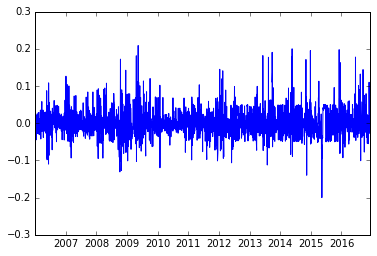

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(returns['3IINFOTECH.NS'])

In [14]:
print mu.shape
print cov.shape
print returns.shape

(1087,)
(1087, 1087)
(2854, 1087)


7.32961757953e+18


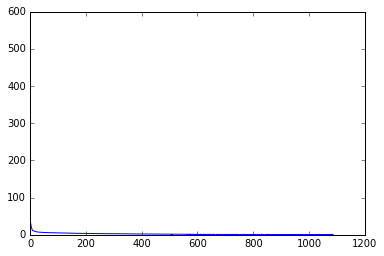

In [15]:
print np.linalg.cond(cov)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.linalg.eigvals(cov))

In [34]:
from scipy import linalg

from sklearn.covariance import LedoitWolf, OAS, ShrunkCovariance, \
    log_likelihood, empirical_covariance

train = 0.5    
train_test_break = returns.index[0.5*returns.shape[0]]
#empirical
emp_cov = empirical_covariance(returns.ix[:train_test_break])
# Ledoit-Wolf optimal shrinkage coefficient estimate
lw = LedoitWolf()
loglik_lw = lw.fit(returns.ix[:train_test_break]).score(returns.ix[train_test_break:])
# OAS coefficient estimate
oa = OAS()
loglik_oa = oa.fit(returns.ix[:train_test_break]).score(returns.ix[train_test_break:])

In [38]:
print ('loglike-original:',-log_likelihood(np.array(cov), linalg.inv(np.array(cov))),'loglike-emp:',-log_likelihood(emp_cov, linalg.inv(cov)),'loglike-lw:',-log_likelihood(lw.covariance_, linalg.inv(cov)),'loglike-oas:',-log_likelihood(oa.covariance_, linalg.inv(cov)))
print ('cond-original:',np.linalg.cond(cov),'cond-emp:',np.linalg.cond(emp_cov),'cond-lw:',np.linalg.cond(lw.covariance_),'cond-oas:',np.linalg.cond(oa.covariance_))
eig_vals = pd.DataFrame({'original':np.linalg.eigvals(cov),'empirical':np.linalg.eigvals(emp_cov),'lediot':np.linalg.eigvals(lw.covariance_),'oa':np.linalg.eigvals(oa.covariance_)})
print eig_vals.head()
print eig_vals.tail()


('loglike-original:', 1704.4611647624727, 'loglike-emp:', 1162.2362277637726, 'loglike-lw:', 203975355543.20441, 'loglike-oas:', 115653811636.7433)
('cond-original:', 7.3296175795284695e+18, 'cond-emp:', 2.5795253250580869e+18, 'cond-lw:', 11014.795295528307, 'cond-oas:', 19622.637720015013)
   empirical    lediot        oa    original
0   0.255256  0.249439  0.251958  564.916998
1   0.017296  0.016923  0.017084   38.669343
2   0.013167  0.012889  0.013009   31.404639
3   0.008322  0.008154  0.008227   27.508373
4   0.007765  0.007610  0.007677   21.966411
      empirical    lediot        oa  original
1082   0.000059  0.000088  0.000078  0.856517
1083   0.000059  0.000100  0.000078  0.862188
1084   0.000086  0.000104  0.000091  0.869867
1085   0.000000  0.000023  0.000013  0.869341
1086   0.000000  0.000023  0.000013  0.867132


In [ ]:
#plt.plot(np.linalg.eigvals(cov)[:20],'r')
#plt.plot(np.linalg.eigvals(emp_cov)[:20],'g')
#plt.plot(np.linalg.eigvals(lw.covariance_)[:20],'b')
#plt.plot(np.linalg.eigvals(oa.covariance_)[:20],'y')

In [32]:
np.linalg.eigvals(lw.covariance_)[:20]

array([ 0.249439  ,  0.01692291,  0.01288868,  0.00815445,  0.00760998,
        0.00717602,  0.00588456,  0.00579893,  0.00542467,  0.00494524,
        0.00471341,  0.00462105,  0.00425355,  0.00418705,  0.00413672,
        0.00381448,  0.00376915,  0.00373108,  0.00354248,  0.00351448])

In [40]:
lw_cov = lw.covariance_
print mu.head()
print lw_cov

20MICRONS.NS     0.000677
3IINFOTECH.NS   -0.000371
3MINDIA.NS       0.001121
AARTIDRUGS.NS    0.001554
AARTIIND.NS      0.001314
dtype: float64
[[  7.27084140e-04   1.91832942e-04   7.43295127e-05 ...,   7.30784867e-05
    4.95891248e-05   1.35712595e-04]
 [  1.91832942e-04   1.02555297e-03   2.24086519e-04 ...,   2.49539110e-04
    2.84083100e-05   3.35930122e-04]
 [  7.43295127e-05   2.24086519e-04   5.85330939e-04 ...,   1.30716753e-04
    1.62164664e-05   1.49324223e-04]
 ..., 
 [  7.30784867e-05   2.49539110e-04   1.30716753e-04 ...,   8.99108798e-04
    1.48444100e-05   1.29859210e-04]
 [  4.95891248e-05   2.84083100e-05   1.62164664e-05 ...,   1.48444100e-05
    2.06686836e-04   3.24589586e-05]
 [  1.35712595e-04   3.35930122e-04   1.49324223e-04 ...,   1.29859210e-04
    3.24589586e-05   8.35957334e-04]]


[(0.01, 0.0026528920377499828, 0.034328674100050909), (0.037275937203149402, 0.0026528920377479294, 0.034328674100019801), (0.13894954943731375, 0.0026528920377410512, 0.0343286740999093), (0.51794746792312096, 0.0024805547864019833, 0.025997896181473908), (1.9306977288832496, 0.002035855575843076, 0.013900599229437307), (7.1968567300115138, 0.0014685614078490737, 0.0068595433614584578), (26.826957952797247, 0.0010397219621748174, 0.003129336339543036), (100.0, 0.00073886666185629202, 0.0020344387666802483)]
(0.01, 0.077279187364421062)
(0.037275937203149402, 0.077279187364431276)
(0.13894954943731375, 0.077279187364479668)
(0.51794746792312096, 0.095413673825254591)
(1.9306977288832496, 0.14645811610277515)
(7.1968567300115138, 0.21409025797554432)
(26.826957952797247, 0.33224998829197239)
(100.0, 0.36317960213762446)


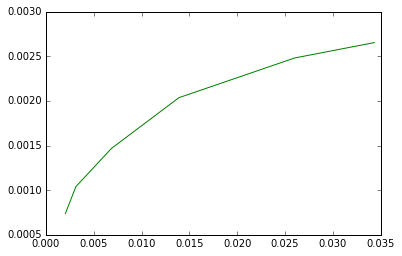

In [101]:
#lasso optimization
from cvxpy import *


# Construct the problem.
w = Variable(mu.shape[0])
gamma = Parameter(sign='positive')
risk = quad_form(w,np.array(lw_cov))
ret = w.T*np.array(mu)
prob = Problem(Maximize( ret - gamma*risk), 
               [ sum_entries(w) == 1,norm(w, 1) <= 1,sum_entries(power(w,0))<20])# #long only w >= 0
#result = prob.solve()
#print w.value

# Compute trade-off curve.
SAMPLES = 8
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 2, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value

    
print zip(gamma_vals,ret_data,risk_data)
plt.plot(risk_data,ret_data,'g-')
for i,j,k in zip(gamma_vals,ret_data,risk_data):
    print (i, j/k)
#objective = Maximize( w.T*(A*w - b))# + lam*norm1(w))
#constraints = [ sum_entries(w) == 1]#sum_entries(w) <= 1,
#prob = Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
#result = prob.solve()
# The optimal value for x is stored in x.value.
#print w.value
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
#print constraints[0].dual_value


[(0.31622776601683794, 0.0026528920353834852, 0.034328674064146032), (0.59948425031894104, 0.0026528918812845047, 0.034328671720782106), (1.1364636663857248, 0.002652891343830943, 0.034328663528660749), (2.1544346900318838, 0.0026528904534746912, 0.034328649040099066), (4.0842386526745216, 0.0026528901762637035, 0.034328645801928688), (7.7426368268112693, 0.0026528908909692808, 0.034328656447211579), (14.677992676220699, 0.0026528897350519454, 0.034328638569209806), (27.825594022071257, 0.0026528850288352664, 0.034328566952407054), (52.749970637026195, 0.0026527998497436404, 0.034327273656876718), (100.0, 0.0026524589905217279, 0.034322152741880795)]
(0.31622776601683794, 0.077279187376312064, 1, 0.99999999999999989)
(0.59948425031894104, 0.077279188162659967, 1, 1.0000000000000024)
(1.1364636663857248, 0.077279190948289125, 1, 1.0000000000000031)
(2.1544346900318838, 0.077279197628076404, 1, 1.0000000000000064)
(4.0842386526745216, 0.077279196842499856, 1, 1.0)
(7.7426368268112693, 0.

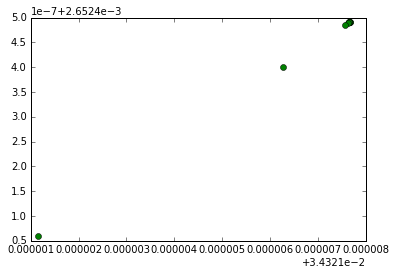

In [105]:
lam = Parameter(sign='positive')
prob = Problem(Maximize( ret - gamma*risk - lam*norm(w,1)), 
               [sum_entries(w) == 1,sum_entries(power(w,0))<20])#long only w >= 0
#result = prob.solve()
#print w.value

# Compute trade-off curve.
SAMPLES = 10
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
result_data = np.zeros(SAMPLES)
w_data = []
gamma.value = 0.13
lambda_vals = np.logspace(-0.5,2,num=SAMPLES)
for i in range(SAMPLES):
    lam.value = lambda_vals[i]
    result_data[i] = prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value
    w_data.append(np.array(w.value).reshape(w.value.shape[0],))
print zip(lambda_vals,ret_data,risk_data)
plt.plot(risk_data,ret_data,'go')
for w, i,j,k in zip(w_data,lambda_vals,ret_data,risk_data):
    print (i, j/k, sum(np.abs(w)>1e-3),np.linalg.norm(w,1) )

In [110]:
print zip(lambda_vals,result_data,risk_data,ret_data)

[(0.31622776601683794, -0.3137280735015443, 0.034328674064146032, 0.0026528920353834852), (0.59948425031894104, -0.59698455780510062, 0.034328671720782106, 0.0026528918812845047), (1.1364636663857248, -1.1339639738398637, 0.034328663528660749, 0.002652891343830943), (2.1544346900318838, -2.1519349974573729, 0.034328649040099066, 0.0026528904534746912), (4.0842386526745216, -4.0817389601532827, 0.034328645801928688, 0.0026528901762637035), (7.7426368268112693, -7.7401371341910528, 0.034328656447211579, 0.0026528908909692808), (14.677992676220699, -14.675492983512646, 0.034328638569209806, 0.0026528897350519454), (27.825594022071257, -27.823094329300964, 0.034328566952407054, 0.0026528850288352664), (52.749970637026195, -52.747470943869928, 0.034327273656876718, 0.0026527998497436404), (100.0, -99.997500241729711, 0.034322152741880795, 0.0026524589905217279)]


In [111]:
np.linalg.cond(lw_cov)

11014.795295528307

In [127]:
print np.where(np.abs(w)>1e-3)[0][0]
print list(returns.columns)[np.where(np.abs(w)>1e-3)[0][0]]

29
AJANTPHARM.NS


In [126]:
list(returns.columns)

['20MICRONS.NS',
 '3IINFOTECH.NS',
 '3MINDIA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AARVEEDEN.NS',
 'ABAN.NS',
 'ABB.NS',
 'ABGSHIP.NS',
 'ABIRLANUVO.NS',
 'ACC.NS',
 'ACE.NS',
 'ACROPETAL.NS',
 'ADANIENT.NS',
 'ADANIPOWER.NS',
 'ADFFOODS.NS',
 'ADHUNIK.NS',
 'ADORWELD.NS',
 'ADSL.NS',
 'ADVANIHOTR.NS',
 'AEGISCHEM.NS',
 'AFL.NS',
 'AGCNET.NS',
 'AGRODUTCH.NS',
 'AHLEAST.NS',
 'AHLUCONT.NS',
 'AHLWEST.NS',
 'AIAENG.NS',
 'AICHAMP.NS',
 'AJANTPHARM.NS',
 'AJMERA.NS',
 'AKSHOPTFBR.NS',
 'AKZOINDIA.NS',
 'ALBK.NS',
 'ALCHEM.NS',
 'ALEMBICLTD.NS',
 'ALICON.NS',
 'ALKALI.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALLSEC.NS',
 'ALMONDZ.NS',
 'ALOKTEXT.NS',
 'ALPHAGEO.NS',
 'ALPSINDUS.NS',
 'AMARAJABAT.NS',
 'AMBIKCO.NS',
 'AMBUJACEM.NS',
 'AMDIND.NS',
 'AMTEKAUTO.NS',
 'ANANTRAJ.NS',
 'ANDHRABANK.NS',
 'ANDHRACEMT.NS',
 'ANDHRSUGAR.NS',
 'ANGIND.NS',
 'ANIKINDS.NS',
 'ANSALAPI.NS',
 'ANSALHSG.NS',
 'ANTGRAPHIC.NS',
 'APARINDS.NS',
 'APCOTEXIND.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTEC

In [97]:
w_data = [np.array(w).reshape(w.shape[0],) for w in w_data]
print zip(lambda_vals,ret_data,risk_data)
plt.plot(risk_data,ret_data,'go')
for w, i,j,k in zip(w_data,lambda_vals,ret_data,risk_data):
    print (i, j/k, sum(np.abs(w)>1e-3),np.linalg.norm(w,1) )

ValueError: total size of new array must be unchanged

In [104]:
lambda_vals,result_data

(array([  0.1       ,   0.18957357,   0.35938137,   0.68129207,
          1.29154967,   2.44843675,   4.64158883,   8.79922544,
         16.68100537,  31.6227766 ]),
 array([-inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]))

In [82]:
aa = np.array(w.value).reshape(w.value.shape[0],)
print sum(np.abs(aa)>1e-3)
print np.linalg.norm(aa,1)

16
1.0


In [69]:
print sum(np.array(w.value)>1e-2)
print np.linalg.norm(np.array(w.value),0)

[15]


ValueError: Invalid norm order for matrices.

In [62]:
print np.linalg.norm(np.array([1,2,3,0]),0)

3

In [67]:
sharpe_per_stock = (mu/np.diag(cov))
print sharpe_per_stock.sort_values(ascending=False)

ASIANPAINT.NS    0.001488
DHANUKA.NS       0.001292
BRITANNIA.NS     0.001273
VGUARD.NS        0.001217
CRISIL.NS        0.001214
LUPIN.NS         0.001197
SUNDARMFIN.NS    0.001182
CADILAHC.NS      0.001170
PGHH.NS          0.001159
PAGEIND.NS       0.001156
COLPAL.NS        0.001135
VINATIORGA.NS    0.001112
MARICO.NS        0.001092
SUPREMEIND.NS    0.001086
PIDILITIND.NS    0.001052
SHREECEM.NS      0.001049
AJANTPHARM.NS    0.001016
GRUH.NS          0.001015
EICHERMOT.NS     0.000994
BOSCHLTD.NS      0.000987
ITC.NS           0.000958
GSKCONS.NS       0.000949
AMARAJABAT.NS    0.000939
KANSAINER.NS     0.000936
SUNPHARMA.NS     0.000935
DIVISLAB.NS      0.000925
DABUR.NS         0.000921
CANFINHOME.NS    0.000918
TORNTPHARM.NS    0.000888
ASHIANA.NS       0.000888
                   ...   
GREENPOWER.NS   -0.000206
UNITEDBNK.NS    -0.000206
KANORICHEM.NS   -0.000207
UMESLTD.NS      -0.000207
DBREALTY.NS     -0.000212
HINDCOPPER.NS   -0.000213
SURANACORP.NS   -0.000222
FARMAXIND.NS

In [77]:
print sharpe_per_stock.sort_values(ascending=False).tail(100).index.shape
print (f.tail(1)[sharpe_per_stock.sort_values(ascending=False).tail(100).index]>10).sum()

(100,)
HANUNG.NS        0
PVP.NS           0
TEXMOPIPES.NS    1
PARACABLES.NS    0
TI.NS            1
EASTSILK.NS      0
VIJSHAN.NS       1
ESL.NS           0
PUNJLLOYD.NS     1
PDPL.NS          1
IVRCLINFRA.NS    0
RCOM.NS          1
VIDEOIND.NS      1
MANDHANA.NS      1
DIAPOWER.NS      1
VASCONEQ.NS      1
TRICOM.NS        0
BGRENERGY.NS     1
ZENITHBIR.NS     0
CYBERMEDIA.NS    1
UNITY.NS         0
ABGSHIP.NS       1
ASIL.NS          0
MTNL.NS          1
INDSWFTLTD.NS    0
ISMTLTD.NS       0
ASIANHOTNR.NS    1
KAUSHALYA.NS     0
EUROCERA.NS      0
ORBITCORP.NS     0
                ..
GREENPOWER.NS    1
UNITEDBNK.NS     1
KANORICHEM.NS    1
UMESLTD.NS       0
DBREALTY.NS      1
HINDCOPPER.NS    1
SURANACORP.NS    0
FARMAXIND.NS     0
GTOFFSHORE.NS    1
PRADIP.NS        0
CCCL.NS          0
KSK.NS           1
ZYLOG.NS         0
STERLINBIO.NS    0
SAMTEL.NS        0
BILPOWER.NS      0
JPINFRATEC.NS    0
FIRSTWIN.NS      0
RAMSARUP.NS      0
USHERAGRO.NS     1
PSL.NS           0
KSERA